### Imports

In [ ]:
import math
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.palettes import color_palette

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, KFold

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
def plot_confusion_mtx(mtx):
    plt.figure(figsize=(12,6)); plt.title("Confusion matrix")
    sns.heatmap(mtx, annot=True, cmap="Blues", fmt="d");
    plt.ylabel("True label"); plt.xlabel("Predicted label")

### Analysis

In [ ]:
df_train = pd.read_csv("./train.csv")
df_train.dropna(inplace=True)
y_train = df_train["label"].to_numpy()
x_train = df_train.drop(labels=["label"], axis=1).to_numpy()

In [ ]:
df_train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,18929.000000,18929.0,18929.0,18929.0,18929.0,18929.0,18929.0,18929.0,18929.0,18929.0,...,18929.000000,18929.000000,18929.000000,18929.000000,18929.000000,18929.0,18929.0,18929.0,18929.0,18929.0
mean,4.448465,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.164562,0.099530,0.046014,0.013366,0.001162,0.0,0.0,0.0,0.0,0.0
std,2.879996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.361983,4.235789,2.847981,1.400052,0.159904,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,252.000000,177.000000,22.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
del df_train
x_train = x_train/255.0
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(17036, 784) (17036,)
(1893, 784) (1893,)


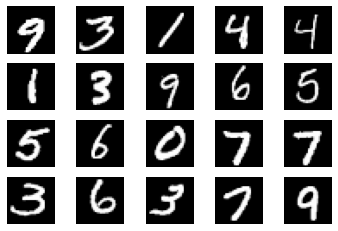

In [ ]:
def plot_images(images, num_images):
    num_rows = math.floor(math.sqrt(num_images))
    num_cols = math.ceil(num_images/num_rows)
    for i in range(num_images):
        reshaped_image = images[i].reshape(28,28)
        plt.subplot(num_rows, num_cols, i+1)
        plt.imshow(reshaped_image, cmap=plt.cm.Greys_r)
        plt.axis('off')
    plt.show()

plot_images(x_train, 20)

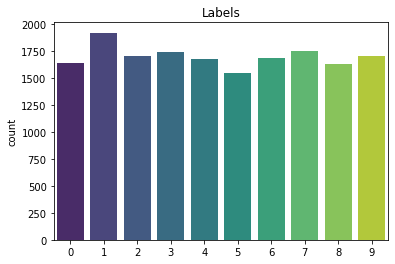

In [ ]:
def plot_labels(labels):
    plt.title("Labels")
    sns.countplot(x=labels, palette='viridis')
    plt.show()

plot_labels(y_train)

### PCA

In [ ]:
pca = PCA(n_components=36, random_state=42) # 784 -> 36

x_train_pca = pca.fit_transform(x_train)
x_valid_pca = pca.transform(x_valid)

print(x_train_pca.shape)
print(x_valid_pca.shape)

(17036, 36)
(1893, 36)


### SVM

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
svm_preciznost = []
svm_models = []

for c in [1, 5, 10]:
    for F in ['rbf', 'poly']:
        indeksi = kf.split(x_train_pca, y_train)
        preciznost_tmp = []
            
        for train_index, test_index in indeksi:

            SVM = SVC(C=c, kernel=F)
            SVM.fit(x_train_pca[train_index,:], y_train[train_index])

            y_pred = SVM.predict(x_train_pca[test_index,:])
            preciznost_tmp.append(accuracy_score(y_train[test_index], y_pred))
              
        print(f'za parametre C = {c}, kernel = {F} tacnost je: {np.mean(preciznost_tmp):.4f}')
        svm_models.append(SVM)
        svm_preciznost.append(np.mean(preciznost_tmp))
print(f'najbolja tacnost je u iteraciji broj: {np.argmax(svm_preciznost)}')
svm = svm_models[np.argmax(svm_preciznost)]

za parametre C = 1, kernel = rbf tacnost je: 0.9714
za parametre C = 1, kernel = poly tacnost je: 0.9712
za parametre C = 5, kernel = rbf tacnost je: 0.9763
za parametre C = 5, kernel = poly tacnost je: 0.9729
za parametre C = 10, kernel = rbf tacnost je: 0.9761
za parametre C = 10, kernel = poly tacnost je: 0.9733
najbolja tacnost je u iteraciji broj: 2


In [ ]:
svm_y_preds = svm.predict(x_valid_pca)
print(f'{accuracy_score(y_valid, svm_y_preds):.4f}')

svm.fit(x_valid_pca, y_valid)

0.9757


SVC(C=5)

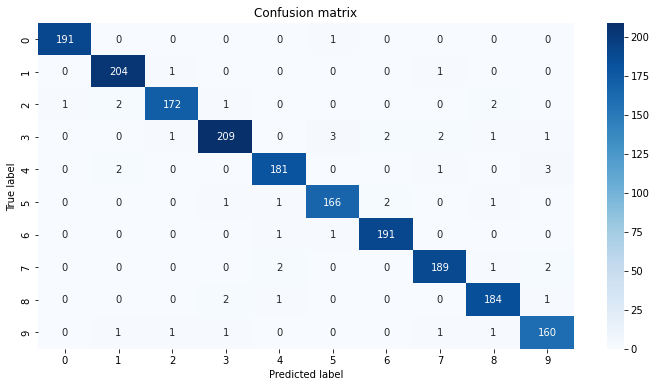

In [ ]:
# mesa 8 vs 3 & 4 vs 9
plot_confusion_mtx(confusion_matrix(y_valid, svm_y_preds))

### kNN

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
knn_preciznost = []
knn_models = []
# euclidean = sqrt(sum((x - y)^2)) - real
# chebyshev = max(|x - y|) - real
# canbera = sum(|x - y| / (|x| + |y|)) - integer

for k in [1, 5, 10]:
    for m in ['euclidean', 'chebyshev', 'canberra']:

      indeksi = kf.split(x_train_pca, y_train)
      preciznost_tmp = []
      
      for train_index, test_index in indeksi:

          kNN = KNeighborsClassifier(n_neighbors=k, metric=m)
          kNN.fit(x_train_pca[train_index,:], y_train[train_index])

          knn_y_pred = kNN.predict(x_train_pca[test_index,:])
          preciznost_tmp.append(accuracy_score(y_train[test_index], knn_y_pred))
        
      print(f'za parametre k = {k} i m = {m} tacnost je: {np.mean(preciznost_tmp):.4f}')
      
      knn_models.append(kNN)
      knn_preciznost.append(np.mean(preciznost_tmp))
print(f'najbolja tacnost je u iteraciji broj: {np.argmax(knn_preciznost)}')
knn = knn_models[np.argmax(knn_preciznost)]

za parametre k = 1 i m = euclidean tacnost je: 0.9633
za parametre k = 1 i m = chebyshev tacnost je: 0.9489
za parametre k = 1 i m = canberra tacnost je: 0.9307
za parametre k = 5 i m = euclidean tacnost je: 0.9645
za parametre k = 5 i m = chebyshev tacnost je: 0.9508
za parametre k = 5 i m = canberra tacnost je: 0.9391
za parametre k = 10 i m = euclidean tacnost je: 0.9604
za parametre k = 10 i m = chebyshev tacnost je: 0.9454
za parametre k = 10 i m = canberra tacnost je: 0.9398
najbolja tacnost je u iteraciji broj: 3


In [ ]:
knn_y_preds = knn.predict(x_valid_pca)
print(f'{accuracy_score(y_valid, knn_y_preds):.4f}')

knn.fit(x_valid_pca, y_valid)

0.9625


KNeighborsClassifier(metric='euclidean')

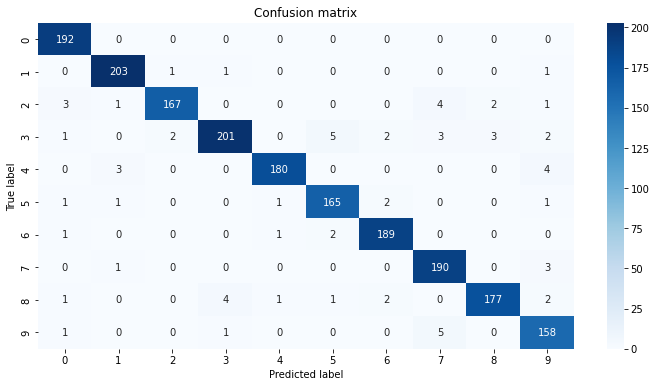

In [ ]:
plot_confusion_mtx(confusion_matrix(y_valid, knn_y_preds))

### Decision Tree

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
clf_preciznost = []
clf_models = []

for depth in [25, 50, None]:
    for crit in ['gini', 'entropy']:

        indeksi = kf.split(x_train_pca, y_train)
        preciznost_tmp = []
            
        for train_index, test_index in indeksi:

            clf = DecisionTreeClassifier(criterion=crit, max_depth=depth) #weights mozda 
            clf.fit(x_train_pca[train_index,:], y_train[train_index])

            clf_y_pred = clf.predict(x_train_pca[test_index,:])
            preciznost_tmp.append(accuracy_score(y_train[test_index], clf_y_pred))

        clf_models.append(clf)
        print(f'za parametre depth = {depth} i criterion = {crit} tacnost je: {np.mean(preciznost_tmp):.4f}')
            
        clf_preciznost.append(np.mean(preciznost_tmp))
print(f'najbolja tacnost je u iteraciji broj: {np.argmax(clf_preciznost)}')
clf_final = clf_models[np.argmax(clf_preciznost)]

za parametre depth = 25 i criterion = gini tacnost je: 0.7984
za parametre depth = 25 i criterion = entropy tacnost je: 0.8109
za parametre depth = 50 i criterion = gini tacnost je: 0.7976
za parametre depth = 50 i criterion = entropy tacnost je: 0.8094
za parametre depth = None i criterion = gini tacnost je: 0.7983
za parametre depth = None i criterion = entropy tacnost je: 0.8102
najbolja tacnost je u iteraciji broj: 1


In [ ]:
clf_y_preds = clf_final.predict(x_valid_pca)
print(f'{accuracy_score(y_valid, clf_y_preds):.4f}')

clf_final.fit(x_valid_pca, y_valid)

0.8156


DecisionTreeClassifier(criterion='entropy', max_depth=25)

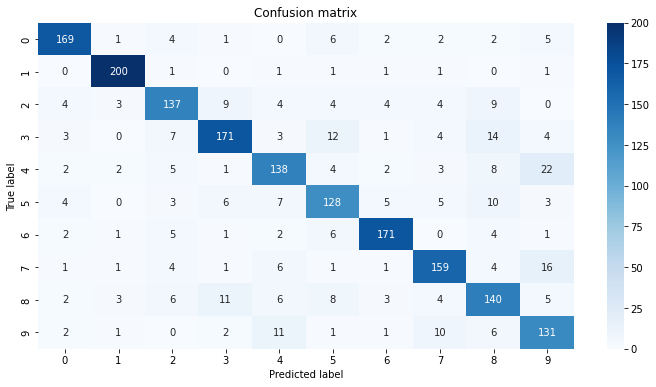

In [ ]:
plot_confusion_mtx(confusion_matrix(y_valid, clf_y_preds))

##Wrongly classified SVM

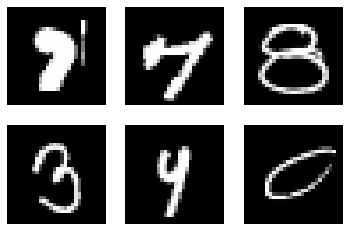

Correct: [7 7 8 3 4 0], Predicted: [8 4 3 9 9 5]


In [ ]:
indices = (svm_y_preds != y_valid) 
plot_images(x_valid[indices], 6)
print(f'Correct: {y_valid[indices][:6]}, Predicted: {svm_y_preds[indices][:6]}')

## Test.csv

In [ ]:
x_test = pd.read_csv("./test.csv")
x_test.dropna(inplace=True)
x_test = x_test/255.0

x_test_pca = pca.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but PCA was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [ ]:
svm_results = svm.predict(x_test_pca)
svm_results

array([2, 0, 9, ..., 2, 1, 8])

In [ ]:
knn_results = knn.predict(x_test_pca)
knn_results

array([2, 0, 9, ..., 2, 1, 8])

In [ ]:
clf_results = clf_final.predict(x_test_pca)
clf_results

array([2, 0, 4, ..., 2, 1, 5])